In [4]:
from PIL import Image
import numpy as np
import string, random
import pandas as pd

amino_acid_magnitude = {acid:0 for acid in string.ascii_uppercase}
amp_range = list(range(0,255))
for acid in string.ascii_uppercase:
    #print(f"Searching mag for acid :{acid}")
    check_count = 0
    while check_count < len(string.ascii_letters):
        amino_acid_magnitude[acid] = random.choice(amp_range)
        for acid_, mag in amino_acid_magnitude.items():
            if acid_!=acid:
                if abs(mag-amino_acid_magnitude[acid])>4:
                    check_count+=1
                    
    #print(f"Mag for {acid}: {amino_acid_magnitude[acid]}")
# check 
for acid, mag in amino_acid_magnitude.items():
    for acid_, mag_ in amino_acid_magnitude.items():
        if acid!=acid_:
            assert abs(mag - mag_)>4, f"{mag}, {mag_}"
set(amino_acid_magnitude.values())

AssertionError: 3, 1

In [25]:
# gray pattern 

# create all possible colors
num_possible_colors = len(string.ascii_uppercase)*4
possible_colors = []
for i in range(num_possible_colors):
    flag = True
    while flag:
        color_ = random.choice(list(range(1,200))+list(range(260,500)))
        if color_ not in possible_colors:
            possible_colors.append(color_)
            flag=False

# define color pallets for each amino acids
color_pallet_map = {}
max_num_colors = list(range(1,6))
for acid in string.ascii_uppercase:
    acid_color_pallet = [(255, 255, 255)]
    num_colors = random.choice(max_num_colors)
    for i in range(num_colors):
        color = random.choice(possible_colors)
        color_index = possible_colors.index(color)
        del possible_colors[color_index]
        acid_color_pallet.append((color,color,color))
    acid_color_pallet.append((0,0,0))
    color_pallet_map[acid] = acid_color_pallet
    
# check no two amino acids has same color
for acid, color_list in color_pallet_map.items():
    for acid_, color_list_ in color_pallet_map.items():
        if acid!=acid_:
            assert color_list !=color_list_

In [28]:
seq = ''.join([random.choice(list(string.ascii_uppercase)) for i in range(300)])


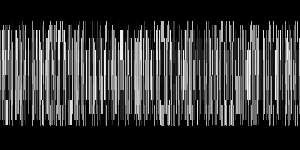

In [84]:
img_h = max(max_num_colors)*30
img_w = len(seq)
img_arr = np.zeros((img_h, img_w,3))

for col_index in range(0, len(seq)):
    acid = seq[col_index]
    color_pallet = color_pallet_map[acid]
    num_colors = len(color_pallet)
    num_row_pixels_per_color = int(round(img_h/num_colors))
    color_index=0
    for i in range(num_colors):
        if i==0:
            assert color_pallet[color_index]==(255, 255, 255)
        img_arr[i*num_row_pixels_per_color:i*num_row_pixels_per_color*2,col_index,:]=color_pallet[color_index]
        color_index = color_index+1

Image.fromarray(img_arr.astype(np.uint8))

In [158]:
min_prop=10
sum_prop = 100
possible_props = list(range(0,100))
choosen_props = []
acid_color_prop_maps = {}
for i in range(len(string.ascii_uppercase)):
    flag=True
    color_props = []
    acid = string.ascii_uppercase[i]
    #print(acid)
    while flag:
        first_prop = random.choice(possible_props)
        second_prop = random.choice(possible_props)
        third_prop = random.choice(possible_props)
#         if first_prop +  second_prop + third_prop == 100 and (first_prop, second_prop, third_prop) not in choosen_props and min(first_prop, second_prop, third_prop)>=10 and first_prop<50 and third_prop<50:
        if first_prop +  second_prop  == 100 and (first_prop, second_prop) not in choosen_props and min(first_prop, second_prop)>=10:
        
            flag=False
            assert (first_prop, second_prop) not in choosen_props
            choosen_props.append((first_prop, second_prop))
            acid_color_prop_maps[acid] = [first_prop, second_prop]

acid_color_prop_maps

{'A': [18, 82],
 'B': [58, 42],
 'C': [31, 69],
 'D': [82, 18],
 'E': [10, 90],
 'F': [72, 28],
 'G': [43, 57],
 'H': [12, 88],
 'I': [22, 78],
 'J': [30, 70],
 'K': [26, 74],
 'L': [69, 31],
 'M': [68, 32],
 'N': [56, 44],
 'O': [36, 64],
 'P': [62, 38],
 'Q': [53, 47],
 'R': [71, 29],
 'S': [49, 51],
 'T': [64, 36],
 'U': [54, 46],
 'V': [50, 50],
 'W': [90, 10],
 'X': [15, 85],
 'Y': [47, 53],
 'Z': [40, 60]}

In [166]:
seq = ''.join([random.choice(string.ascii_uppercase) for i in range(1000)])
seq1='SFDPSGTYHFTTRLPVKGQTSIDSPDLAYYEAGQSVYYDKVVTAGGYTWLSYLSFSGNRR'
seq2 = 'SIPSQGNYVFQETTPVKNAASMSSPTQFNFDKGDKVFYDKVLEADGHQWISYVSYSGIRR'

def func(seq):
    acid_width = 1
    img_h = 150
    img_w = len(seq)*acid_width
    img = np.full((img_h, img_w, 3),(500,500,500))
    for index,acid in enumerate(seq):
        color_props = acid_color_prop_maps[acid]
        white = (255,255,255)
        black = (0,0,0)
#         gray = (90,90,90)
        first_split = round(int(img_h*color_props[0]*0.01))
#         second_split = round(int(img_h*color_props[1]*0.01))
        #print(first_split, second_split)
        img[:first_split, index*acid_width:index*acid_width*2, :] = white
#         img[first_split:first_split+second_split, index*acid_width:index*acid_width*2, :] = gray
        img[first_split:, index*acid_width:index*acid_width*2, :] = black
    return img

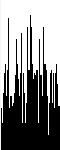

In [167]:
Image.fromarray(func(seq1).astype(np.uint8))

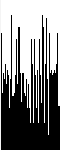

In [168]:
Image.fromarray(func(seq2).astype(np.uint8))

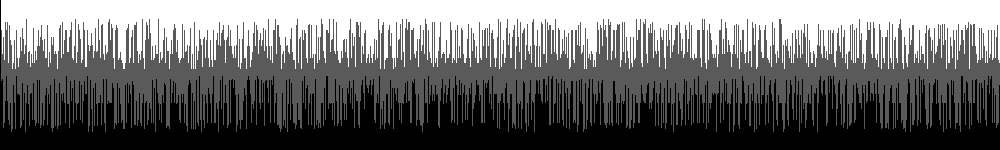

In [145]:
Image.fromarray(img.astype(np.uint8))

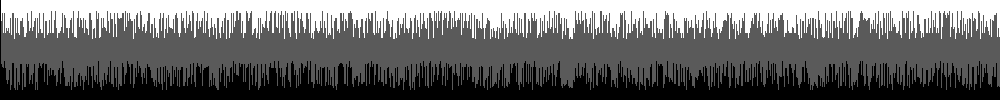

In [136]:
Image.fromarray(img.astype(np.uint8))

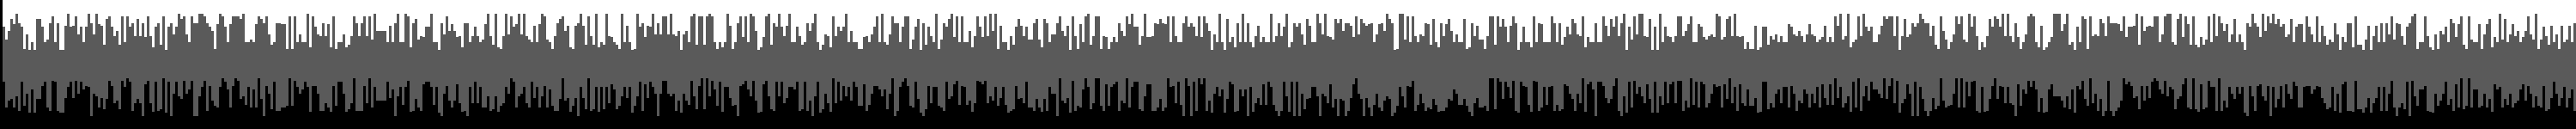

In [140]:
Image.fromarray(img.astype(np.uint8))

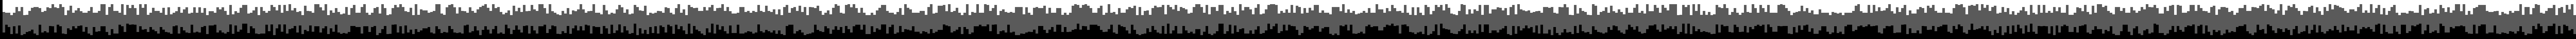

In [142]:
Image.fromarray(img.astype(np.uint8))

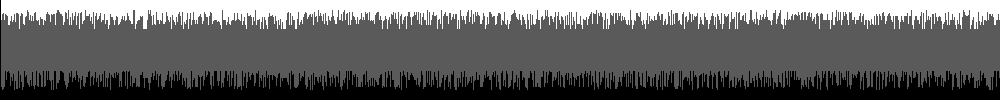

In [128]:
Image.fromarray(img.astype(np.uint8))

In [114]:
img[0,:,1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.])